<br/>

## Loading libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns



## Getting dataset and Reconnaissance

In [4]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/R/Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1




## Converting to DataFrame

In [5]:
X = pd.DataFrame(df[['LB','AC','FM']])
y = pd.DataFrame(df.NSP)

In [11]:
df['NSP'].unique()

array([2, 1, 3], dtype=int64)


## Splitting into Train and Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)



## Model build up

In [8]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 23)
model = dt.fit(X_train, y_train)


## Prediction

In [9]:
y_pred = dt.predict(X_test)



## Model Accuracy

In [10]:
metrics.accuracy_score(y_test, y_pred)

0.8333333333333334

<br/>
<br/>

# Confusion matrix

In [13]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
con_mat

array([[308,  22,   7],
       [ 18,  34,   3],
       [ 12,   9,  13]], dtype=int64)

<br/>

# Visualize the confusion matrix with Seaborn

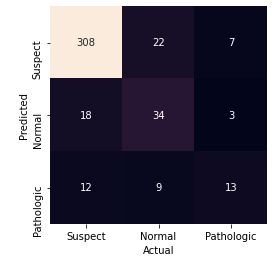

In [26]:
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = ['Suspect','Normal', 'Pathologic'], yticklabels = ['Suspect','Normal', 'Pathologic'])
plt.xlabel("Actual")
plt.ylabel("\nPredicted")
plt.show()

<br/>
<br/>

# Sensitivity and Specitivity for suspect

In [20]:
Sensitivity_Suspect = 308/(18+12+308)
Sensitivity_Suspect

0.9112426035502958

##### Sensitivity_Suspect =  0.911 means only 92% of the patient who are suspected can be identified correctly

In [24]:
Specitivity_Suspect = (34+3+9+13)/(34+3+9+13+22+7)
Specitivity_Suspect

0.6704545454545454

##### Specitivity_Suspect =  0.67 means 67% of the patient who are NormaL or Pathologic can be identified correctly

<br/>
<br/>

# Sensitivity and Specitivity for normal

In [27]:
Sensitivity_normal = 34/(22+9+34)
Sensitivity_Suspect

0.9112426035502958

##### Sensitivity_normal =  0.911 means 91% of the patient who are normal can be identified correctly

In [28]:
Specitivity_normal = (308+7+12+13)/(308+7+12+13+18+3)
Specitivity_normal

0.9418282548476454

##### Specitivity_Suspect =  0.94 means 94% of the patient who are suspect or Pathologic can be identified correctly

<br/>
<br/>

# Sensitivity and Specitivity for pathologic

In [31]:
Sensitivity_patho = 13/(12+9+13)
Sensitivity_patho

0.38235294117647056

##### Sensitivity_normal = 0.38 means 38% of the patient who are patho can be identified correctly

In [33]:
Specitivity_patho = (308+22+18+34)/(308+22+18+34+12+9)
Specitivity_patho

0.9478908188585607

##### Specitivity_patho =  0.94 means 94% of the patient who are normal or suspect can be identified correctly